## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID" , how = "outer", suffixes = ("_mouse_metadata" , "_study_results"))

# Display the data table for preview
merged_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

len(merged_data['Mouse ID'].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
filtered_data_df = merged_data.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = "first")

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
filtered_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.

len(filtered_data_df["Mouse ID"])

1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_volume_mean = filtered_data_df.groupby("Drug Regimen").mean()['Tumor Volume (mm3)']
tumor_volume_median = filtered_data_df.groupby("Drug Regimen").median()['Tumor Volume (mm3)']
tumor_volume_variance = filtered_data_df.groupby("Drug Regimen").var()['Tumor Volume (mm3)']
tumor_volume_standard_deviation = filtered_data_df.groupby("Drug Regimen").std()['Tumor Volume (mm3)']
tumor_volume_sem = filtered_data_df.groupby("Drug Regimen").sem()['Tumor Volume (mm3)']
tumor_volume_dict = {"Mean": tumor_volume_mean,
                    "Median": tumor_volume_mean,
                    "Variance": tumor_volume_variance,
                    'Standard deviation': tumor_volume_standard_deviation,
                    'SEM': tumor_volume_sem}
summary_df = pd.DataFrame.from_dict(tumor_volume_dict)
summary_df

,Mean,Median,Variance,Standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,40.675741,24.947764,4.994774,0.329346
Ceftamin,52.591172,52.591172,39.290177,6.268188,0.469821
Infubinol,52.884795,52.884795,43.128684,6.567243,0.492236
Ketapril,55.235638,55.235638,68.553577,8.279709,0.603860
Naftisol,54.331565,54.331565,66.173479,8.134708,0.596466
Placebo,54.033581,54.033581,61.168083,7.821003,0.581331
Propriva,52.393463,52.393463,43.138803,6.568014,0.525862
Ramicane,40.216745,40.216745,23.486704,4.846308,0.320955
Stelasyn,54.233149,54.233149,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

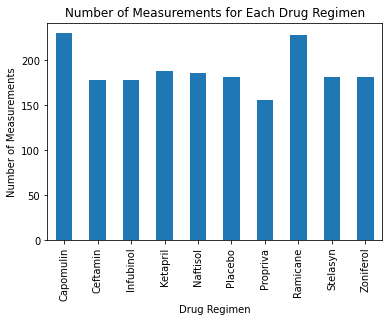

In [9]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_plot_data = filtered_data_df.groupby("Drug Regimen")["Mouse ID"].count()

pandas_bar_plot = bar_plot_data.plot.bar(xlabel = "Drug Regimen", ylabel = "Number of Measurements", title = "Number of Measurements for Each Drug Regimen")

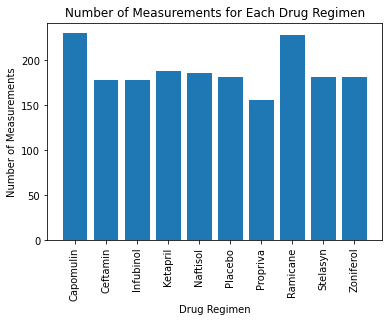

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

plt.bar(bar_plot_data.index, bar_plot_data.values)
plt.xticks(rotation=90)
plt.title("Number of Measurements for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.show()

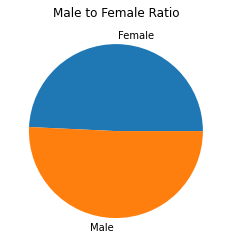

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

pie_plot_data = filtered_data_df.groupby("Sex")['Mouse ID'].count()
pandas_pie_plot = pie_plot_data.plot.pie(ylabel = "", title= "Male to Female Ratio")

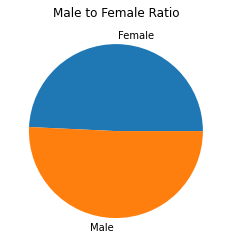

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(pie_plot_data, labels = pie_plot_data.index)
plt.title("Male to Female Ratio")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

df1 = filtered_data_df
timepoint_df = filtered_data_df.groupby("Mouse ID").agg({"Timepoint": "last", "Drug Regimen": "first"})



merged_timepoint_df = timepoint_df.merge(df1, how = "left", on = ["Mouse ID", "Timepoint", "Drug Regimen"])
merged_timepoint_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
capomulin_volume_list = []
ramicane_volume_list = []
infubinol_volume_list = []
ceftamin_volume_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for index,rows in merged_timepoint_df.iterrows():       
        if merged_timepoint_df["Drug Regimen"][index] == "Capomulin":
            tumor_volume =  merged_timepoint_df["Tumor Volume (mm3)"][index]
            capomulin_volume_list.append(tumor_volume)

for index,rows in merged_timepoint_df.iterrows():       
        if merged_timepoint_df["Drug Regimen"][index] == "Ramicane":
            tumor_volume =  merged_timepoint_df["Tumor Volume (mm3)"][index]
            ramicane_volume_list.append(tumor_volume)    

for index,rows in merged_timepoint_df.iterrows():       
        if merged_timepoint_df["Drug Regimen"][index] == "Infubinol":
            tumor_volume =  merged_timepoint_df["Tumor Volume (mm3)"][index]
            infubinol_volume_list.append(tumor_volume)    
            
for index,rows in merged_timepoint_df.iterrows():       
        if merged_timepoint_df["Drug Regimen"][index] == "Ceftamin":
            tumor_volume =  merged_timepoint_df["Tumor Volume (mm3)"][index]
            ceftamin_volume_list.append(tumor_volume)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
boxplot_data = [capomulin_volume_list, ramicane_volume_list, infubinol_volume_list, ceftamin_volume_list]

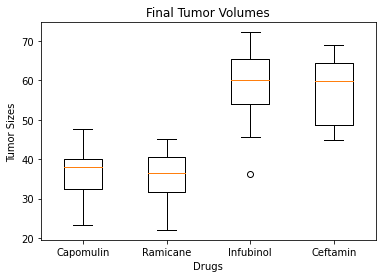

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(boxplot_data, labels = drug_regimen_list)
plt.title("Final Tumor Volumes")
plt.xlabel("Drugs")
plt.ylabel("Tumor Sizes")
plt.show()

## Line and Scatter Plots

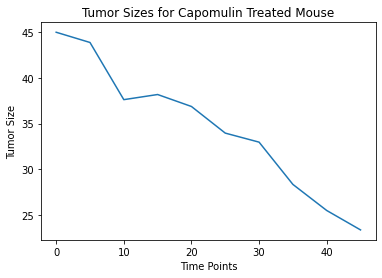

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

tumor_volume_data = filtered_data_df.loc[(filtered_data_df["Drug Regimen"] == "Capomulin") & (filtered_data_df["Mouse ID"] == "s185")]["Tumor Volume (mm3)"]
time_point_data =  filtered_data_df.loc[(filtered_data_df["Drug Regimen"] == "Capomulin") & (filtered_data_df["Mouse ID"] == "s185")]["Timepoint"]



plt.plot(time_point_data, tumor_volume_data)
plt.title("Tumor Sizes for Capomulin Treated Mouse")
plt.xlabel("Time Points")
plt.ylabel("Tumor Size")
plt.show()

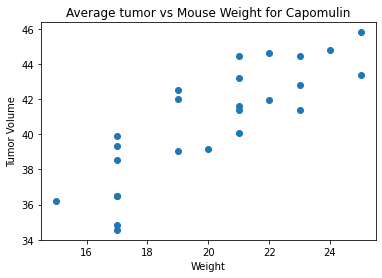

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_data = filtered_data_df[filtered_data_df["Drug Regimen"] == "Capomulin"]     
scatter_plot_data = capomulin_data.groupby("Mouse ID").agg({"Weight (g)" : "first", "Tumor Volume (mm3)" : "mean"})
                                  



plt.scatter(scatter_plot_data["Weight (g)"], scatter_plot_data["Tumor Volume (mm3)"])
plt.title("Average tumor vs Mouse Weight for Capomulin")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

In [19]:
correlation_coefficient = scatter_plot_data["Weight (g)"].corr(scatter_plot_data["Tumor Volume (mm3)"])
correlation_coefficient

0.8419363424694717

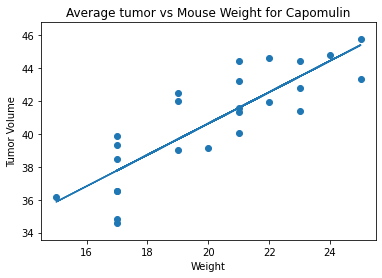

In [20]:
x = scatter_plot_data["Weight (g)"]
m,b = np.polyfit(scatter_plot_data["Weight (g)"], scatter_plot_data["Tumor Volume (mm3)"], 1)



plt.scatter(scatter_plot_data["Weight (g)"], scatter_plot_data["Tumor Volume (mm3)"])
plt.title("Average tumor vs Mouse Weight for Capomulin")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.xlim(scatter_plot_data["Weight (g)"].min()-0.5,scatter_plot_data["Weight (g)"].max()+0.5)
plt.ylim(scatter_plot_data["Tumor Volume (mm3)"].min()-1, scatter_plot_data["Tumor Volume (mm3)"].max()+1)
plt.plot(x, m*x+b)
plt.show()